In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Parameters
N = 10 # Number of genomes generated
L = 2000000 # Length of genomes
c = 10 # Average length of conserved region (Exp distributed)
p_c = 0.995 # ANI of conserved region 
nc = 1 # Average length of non-conserved region (Exp distributed)
p_nc = 0.95 # ANI of non-conserved region
k = 12 # Length of kmer


In [3]:
def generate_initial_genome(L, c, nc):
    genome = []
    regions = []
    while len(genome) < L:
        # Add conserved region
        conserved_length = min(int(np.random.exponential(c)), L - len(genome))
        conserved_region = [random.choice('ACGT') for _ in range(conserved_length)]
        genome.extend(conserved_region)
        regions.append(('c', conserved_length))
        
        # Add non-conserved region
        non_conserved_length = min(int(np.random.exponential(nc)), L - len(genome))
        non_conserved_region = [random.choice('ACGT') for _ in range(non_conserved_length)]
        genome.extend(non_conserved_region)
        regions.append(('n', non_conserved_length))
    
    return genome[:L], regions

def mutate_genome(initial_genome, regions, p_c, p_nc):
    chars = np.array(['A', 'C', 'G', 'T'])
    mutated_genome = initial_genome.copy()
    i = 0
    
    for region_type, region_length in regions:
        for j in range(region_length):
            if i + j < len(initial_genome):
                if region_type == 'c':
                    if np.random.rand() > p_c:
                        mutated_genome[i + j] = random.choice('ACGT'.replace(initial_genome[i + j], ''))
                else:
                    if np.random.rand() > p_nc:
                        mutated_genome[i + j] = random.choice('ACGT'.replace(initial_genome[i + j], ''))
        
        i += region_length
    
    return mutated_genome

def generate_mutated_genomes(N, L, c, p_c, nc, p_nc):
    initial_genome, regions = generate_initial_genome(L, c, nc)
    mutated_genomes = []
    
    for _ in range(N):
        mutated_genome = mutate_genome(initial_genome, regions, p_c, p_nc)
        mutated_genomes.append(''.join(mutated_genome))
    
    return initial_genome, mutated_genomes, regions


# Generate genomes
initial_genome, mutated_genomes, regions = generate_mutated_genomes(N, L, c, p_c, nc, p_nc)

# # Output results
# print("Initial Genome:")
# print(''.join(initial_genome))

# for region_type, region_length in regions:
#     for j in range(region_length):
#         if region_type == "conserved":
#             print('.',end='')
#         else:
#             print('X',end='')
# print()

# print("\nMutated Genomes:")
# for i, genome in enumerate(mutated_genomes):
#     print(f"{genome}")


In [4]:
kmer_dict = {}
for s in mutated_genomes:
    string_set = set()
    for idx in range(len(s)-k+1):
        string_set.add(s[idx:idx+k])

    for kmer in string_set:
        kmer_dict[kmer] = kmer_dict.get(kmer,0)+1


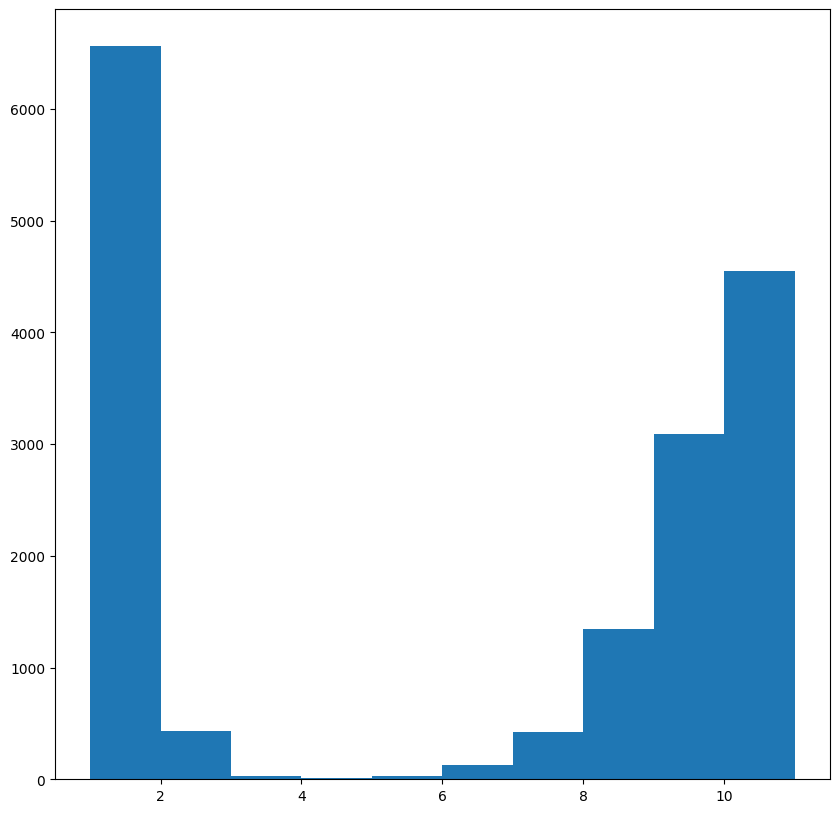

In [5]:
vals = list(kmer_dict.values())

fig, ax = plt.subplots(figsize=(10,10))
ax.hist(vals, bins=range(min(vals),max(vals)+2))
plt.show()